In [1]:
import pandas as pd
from tools.heatmap_estimater_pvalue_change import plot_estimator_pvalue_change, plot_all_pvalue_change, plot_all_data

data_main = pd.read_csv('../results/sem/all_estimates')
print(data_main.head(100))

                  lval op                     rval  Estimate
0   Investment_Opinion  ~    Information_Awareness  0.514286
1   Investment_Opinion  ~  Energy_Crisis_Sentiment -1.110308
2   Investment_Opinion  ~        Ukraine_Sentiment -0.495112
3   Investment_Opinion  ~         Corona_Sentiment -1.499473
4   Economical_Indices  ~  Energy_Crisis_Sentiment  0.595665
5   Economical_Indices  ~        Ukraine_Sentiment  0.422723
6   Economical_Indices  ~         Corona_Sentiment  0.864772
7              F5aA1_1  ~    Information_Awareness  1.000000
8              F5aA2_1  ~    Information_Awareness  1.033017
9              F5aA3_1  ~    Information_Awareness  0.229290
10             F5bA1_1  ~    Information_Awareness  0.836524
11             F5bA2_1  ~    Information_Awareness  0.292526
12             F5bA3_1  ~    Information_Awareness  0.362254
13             F5bA4_1  ~    Information_Awareness  0.940917
14             F5bA5_1  ~    Information_Awareness  0.797341
15             F5A10_1  

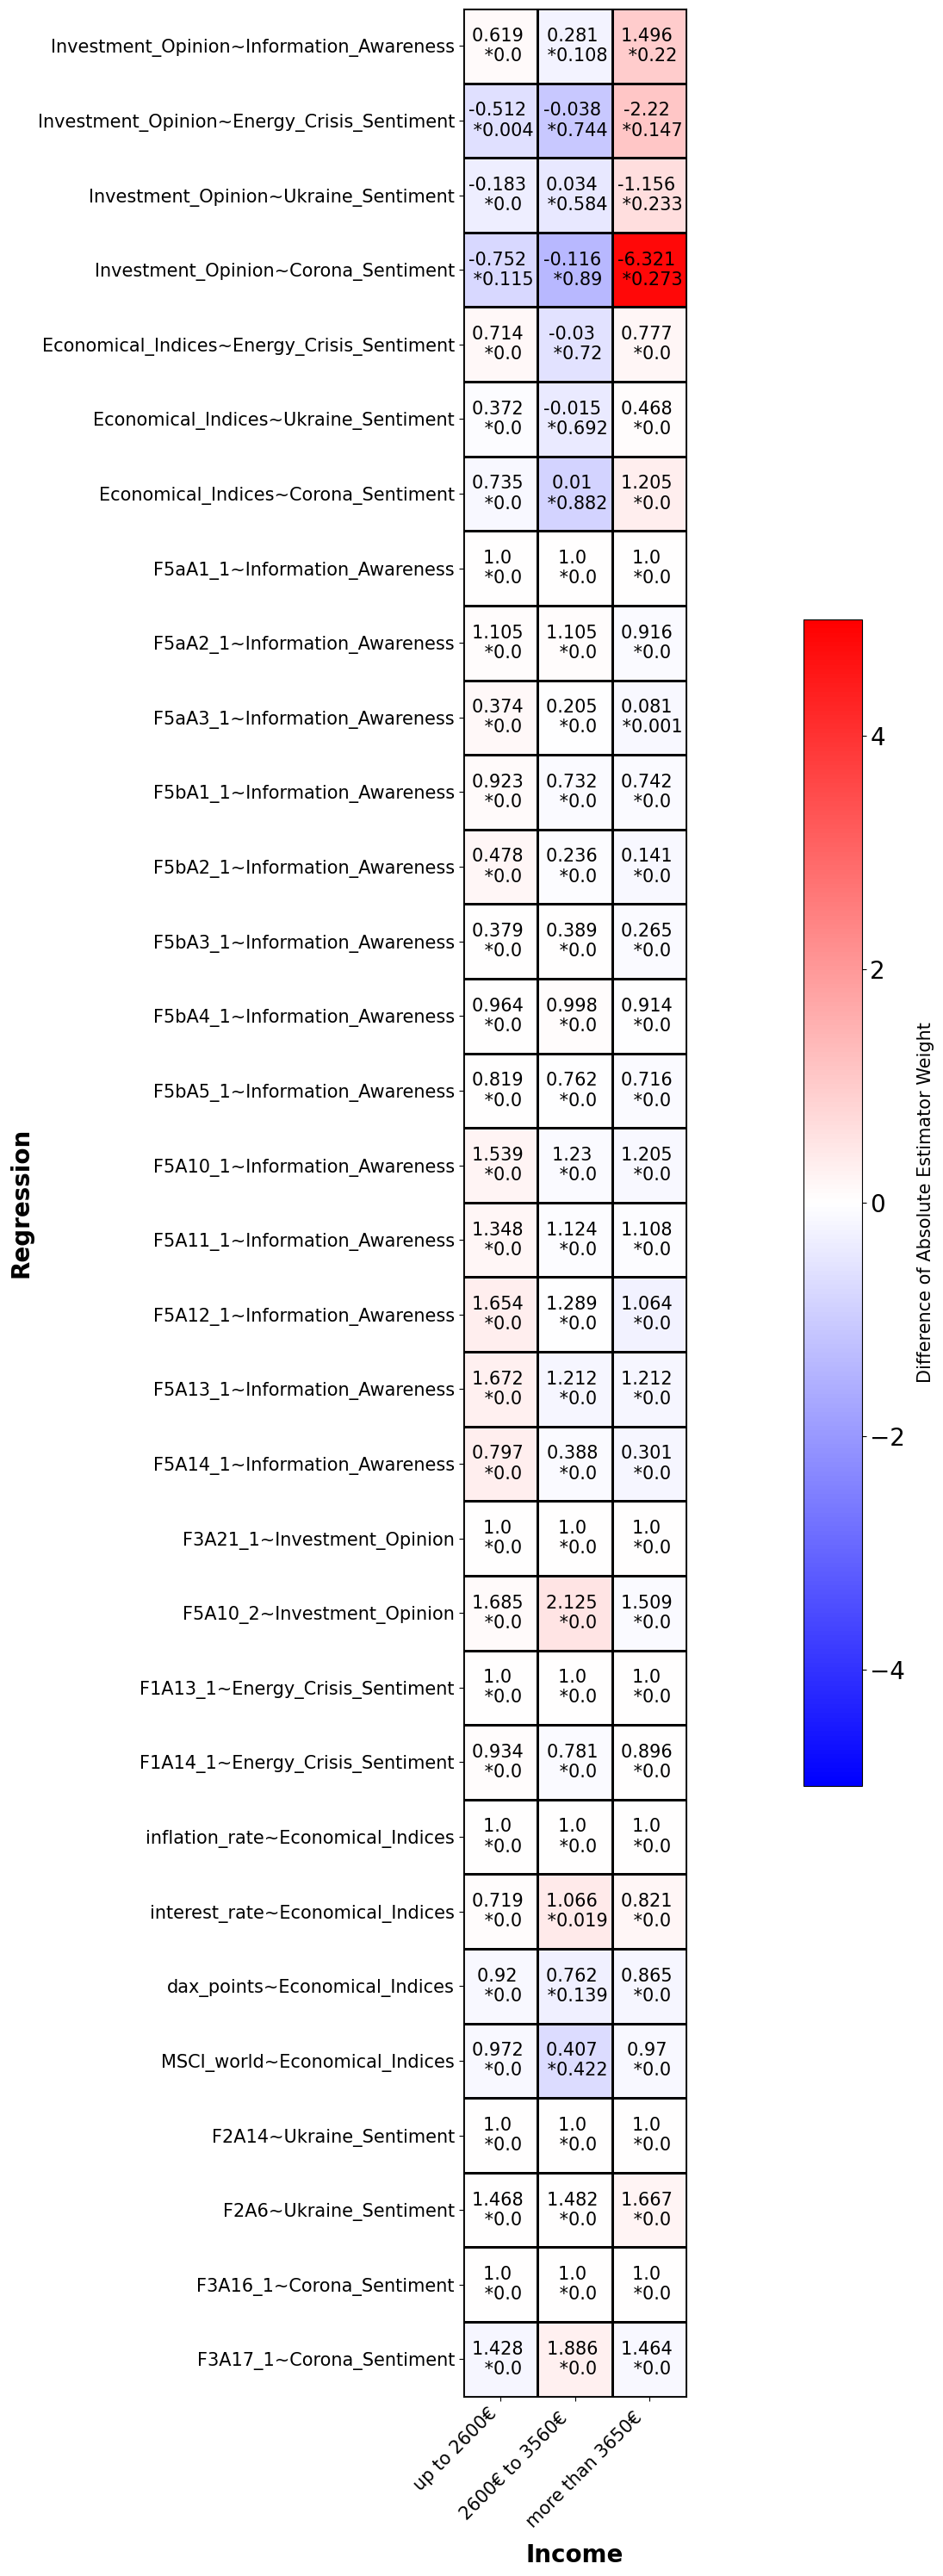

In [2]:
data_income = pd.read_csv('../results/sem_income/all_estimates')
p_income = pd.read_csv('../results/sem_income/all_p')

p_income.replace('-', '0.0', inplace=True)

plot_estimator_pvalue_change(data_main, data_income, ['Estimate1', 'Estimate2', 'Estimate3'], p_income, ['up to 2600€', '2600€ to 3560€ ', 'more than 3650€ '], 'Income')

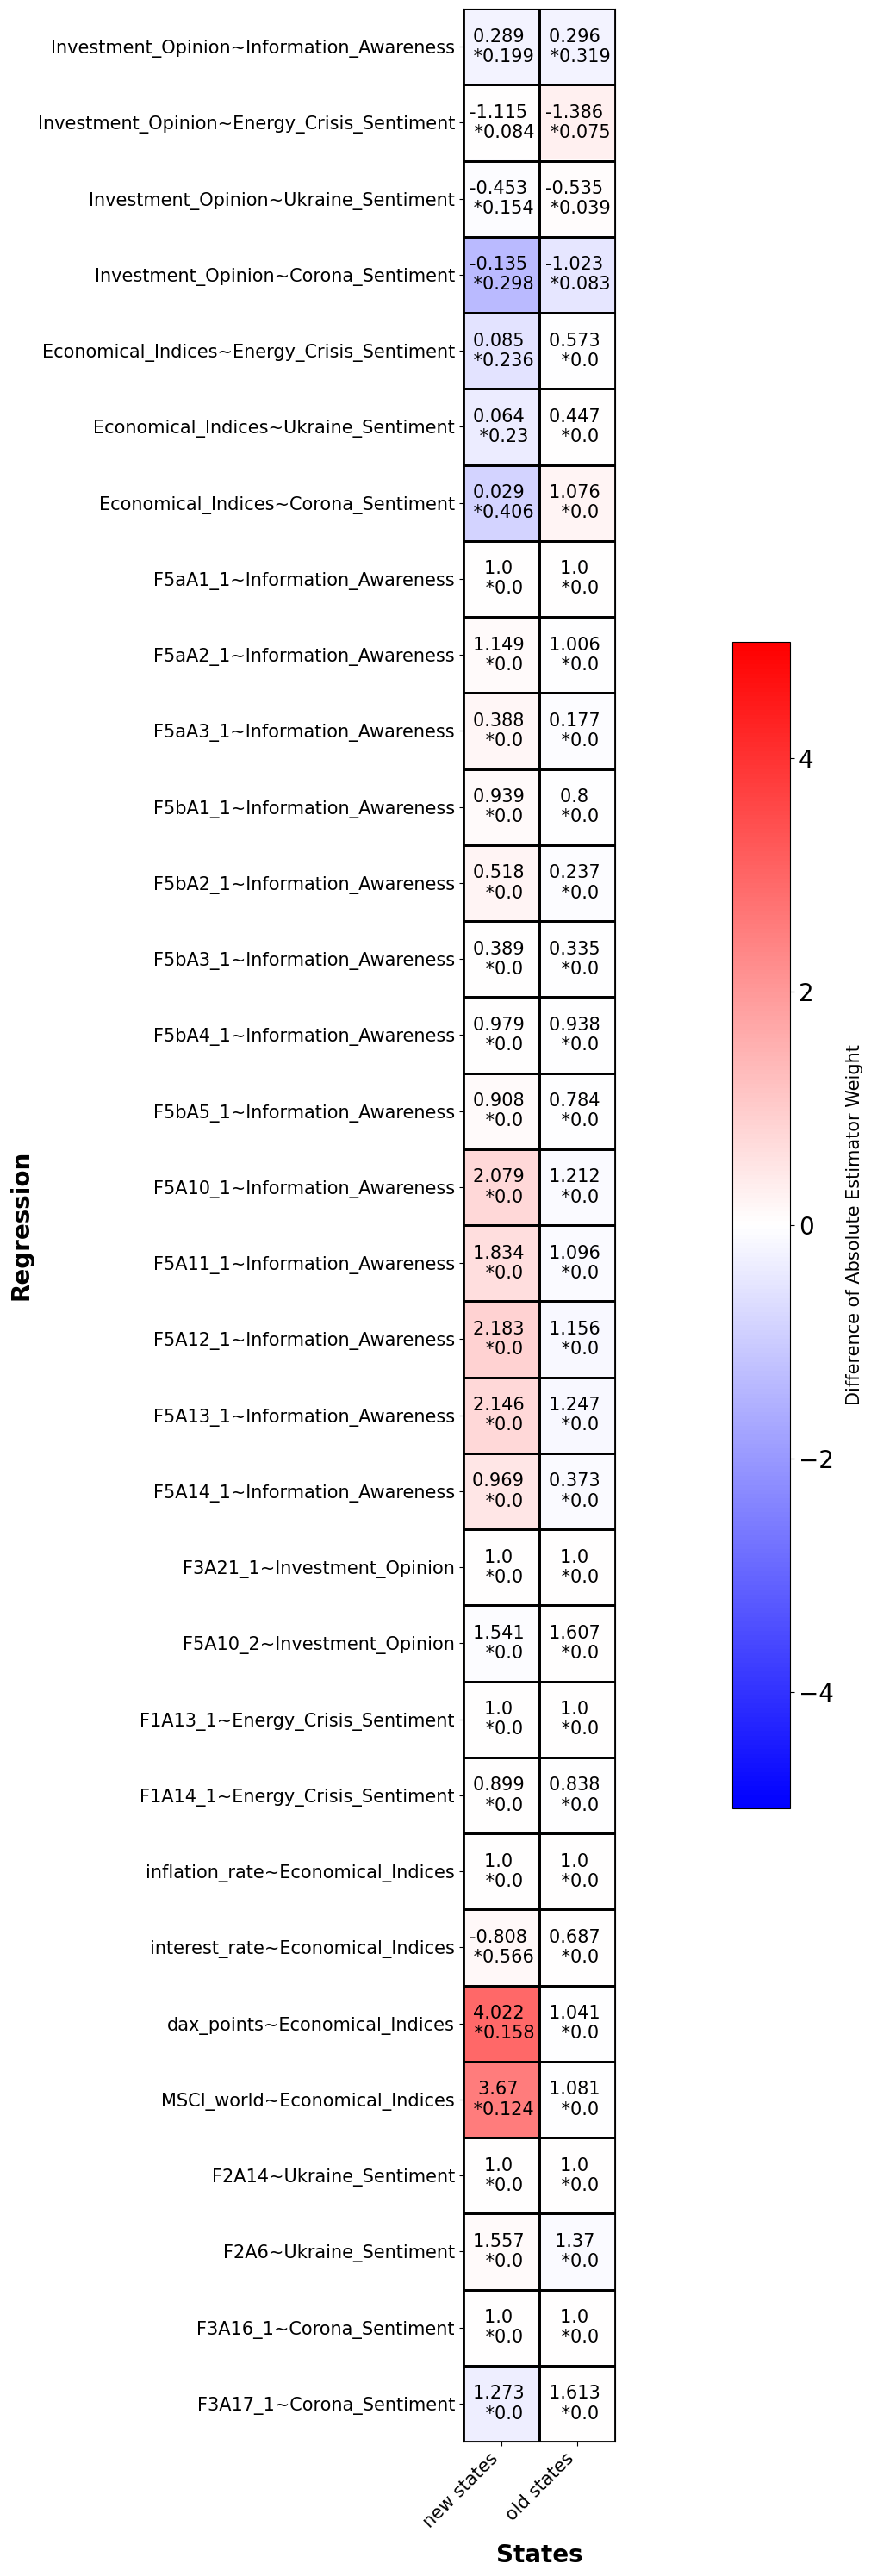

In [3]:
data_states = pd.read_csv('../results/sem_states/all_estimates')
p_states = pd.read_csv('../results/sem_states/all_p')

p_states.replace('-', '0.0', inplace=True)

plot_estimator_pvalue_change(data_main, data_states, ['Estimate1', 'Estimate2'], p_states, ['new states', 'old states'], 'States')

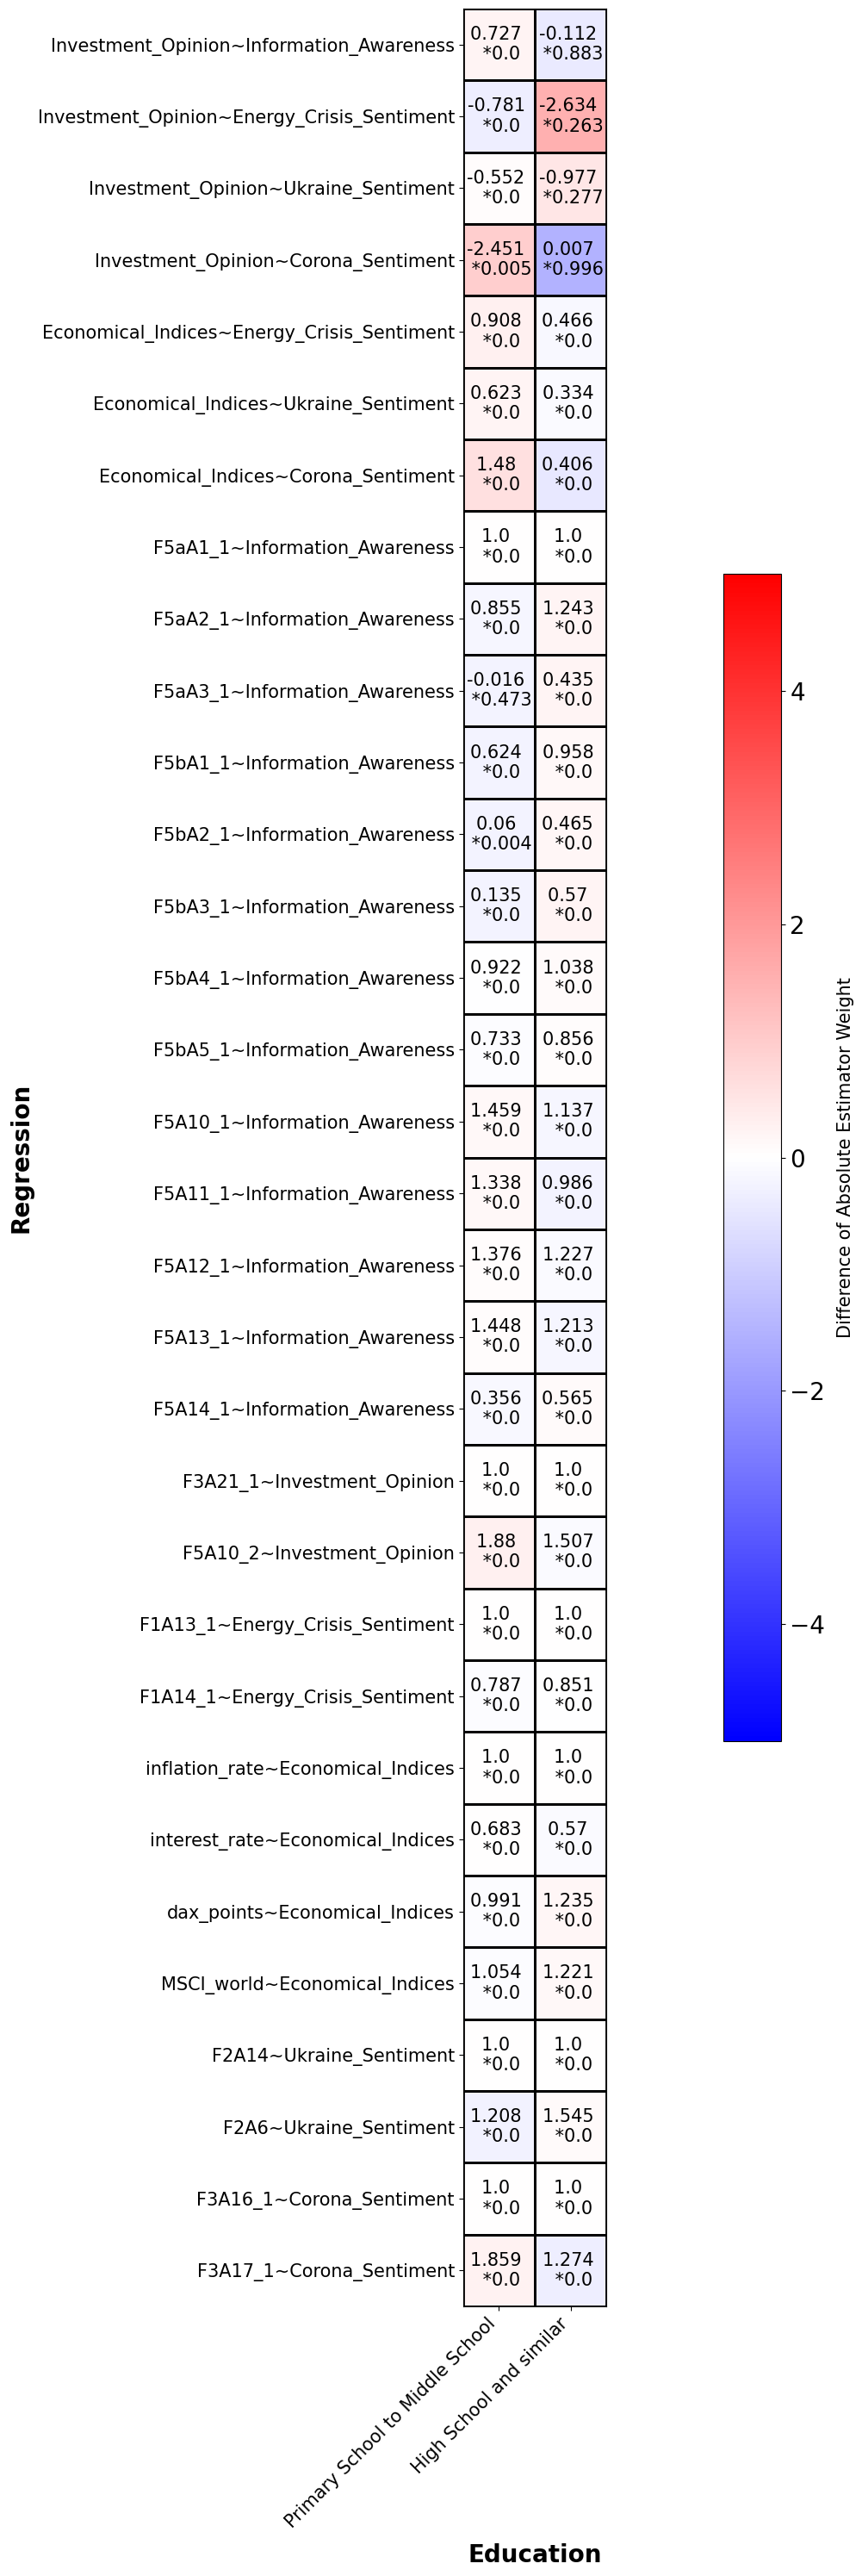

In [4]:
data_edu = pd.read_csv('../results/sem_education/all_estimates')
p_edu = pd.read_csv('../results/sem_education/all_p')

p_edu.replace('-', '0.0', inplace=True)

plot_estimator_pvalue_change(data_main, data_edu, ['Estimate1', 'Estimate2'], p_edu, ['Primary School to Middle School', 'High School and similar'], 'Education')

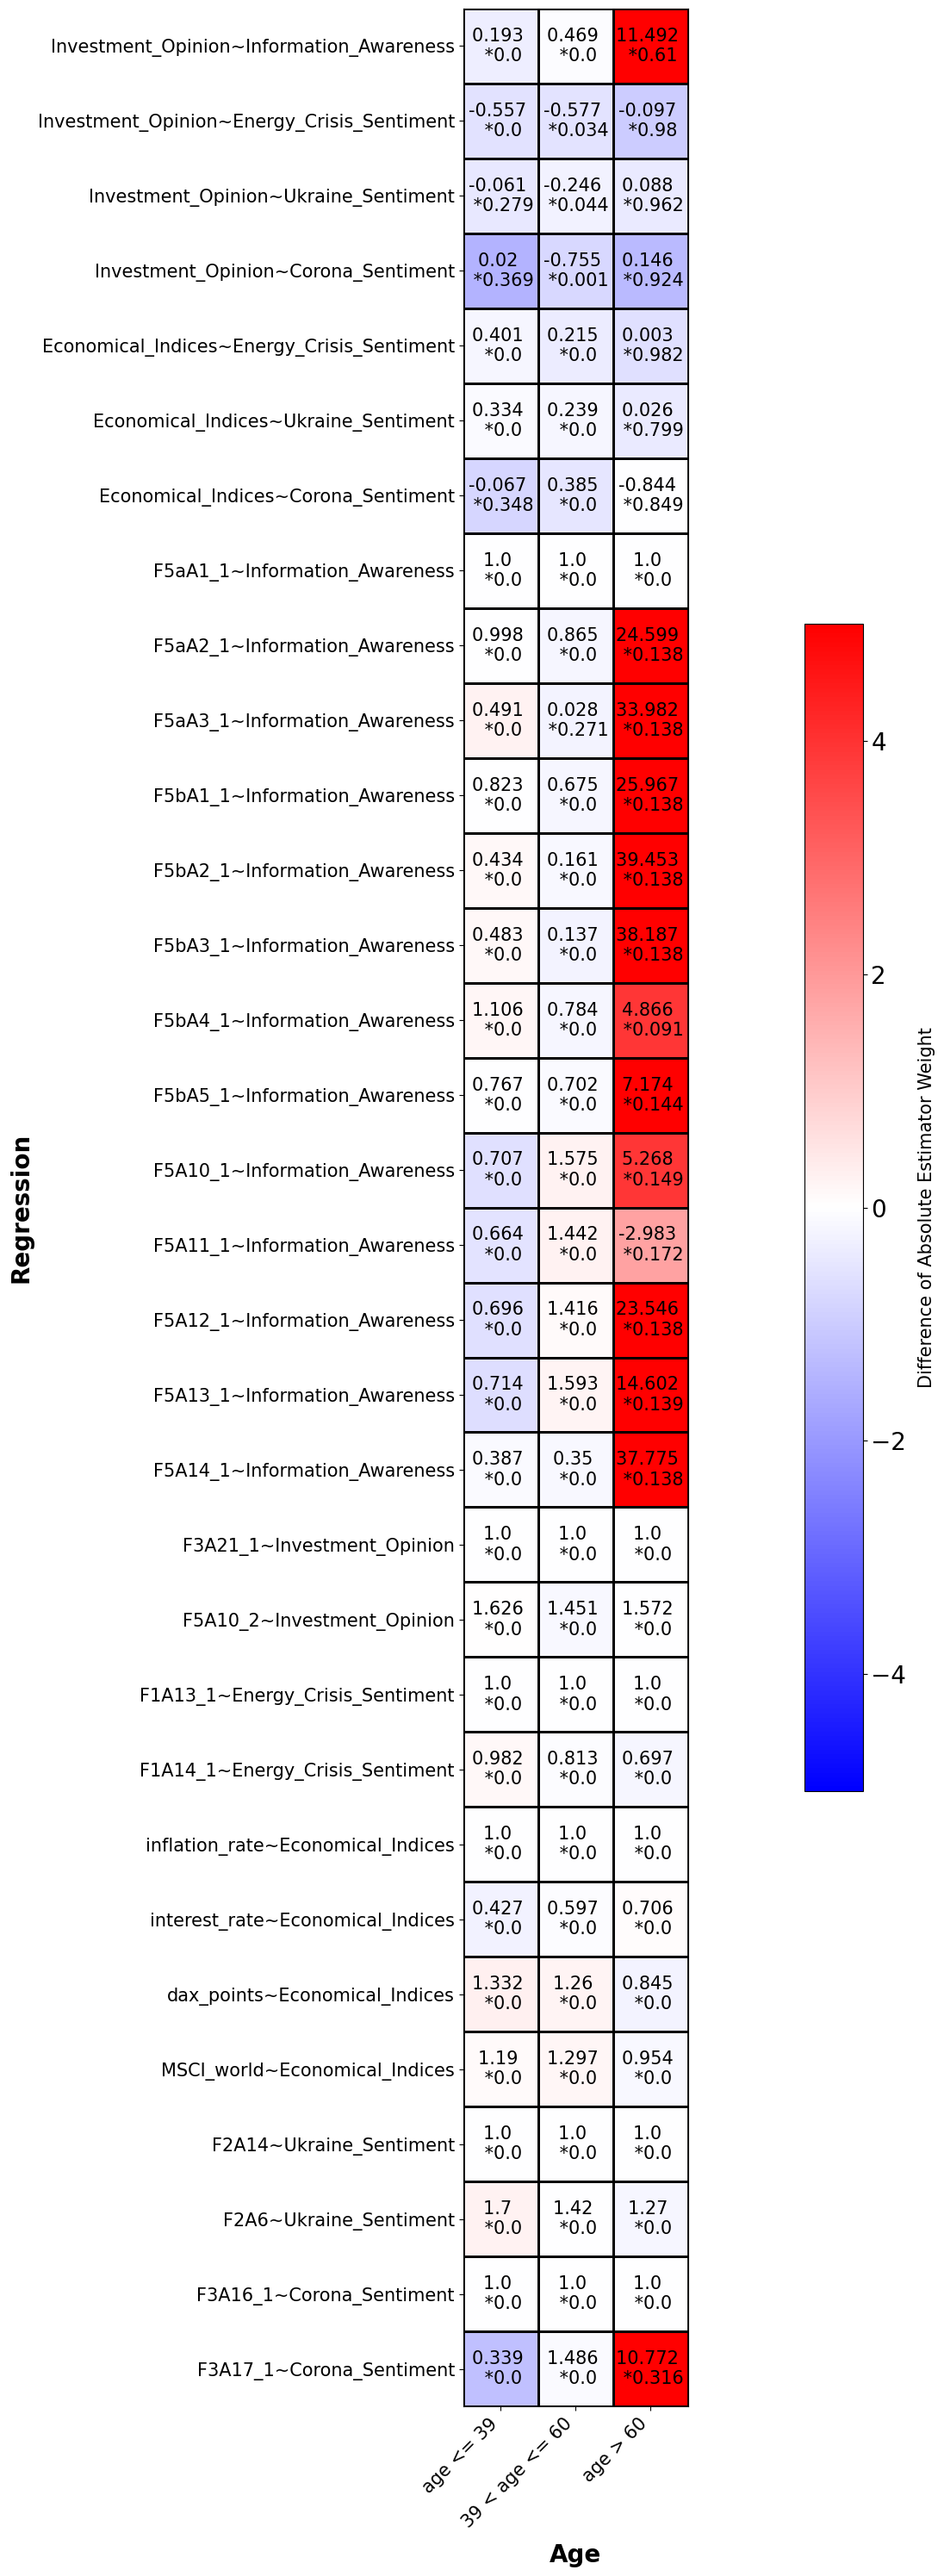

In [5]:
data_age = pd.read_csv('../results/sem_age/all_estimates')
p_age = pd.read_csv('../results/sem_age/all_p')

p_age.replace('-', '0.0', inplace=True)

plot_estimator_pvalue_change(data_main, data_age, ['Estimate1', 'Estimate2', 'Estimate3'], p_age, ['age <= 39', '39 < age <= 60', 'age > 60'], 'Age')

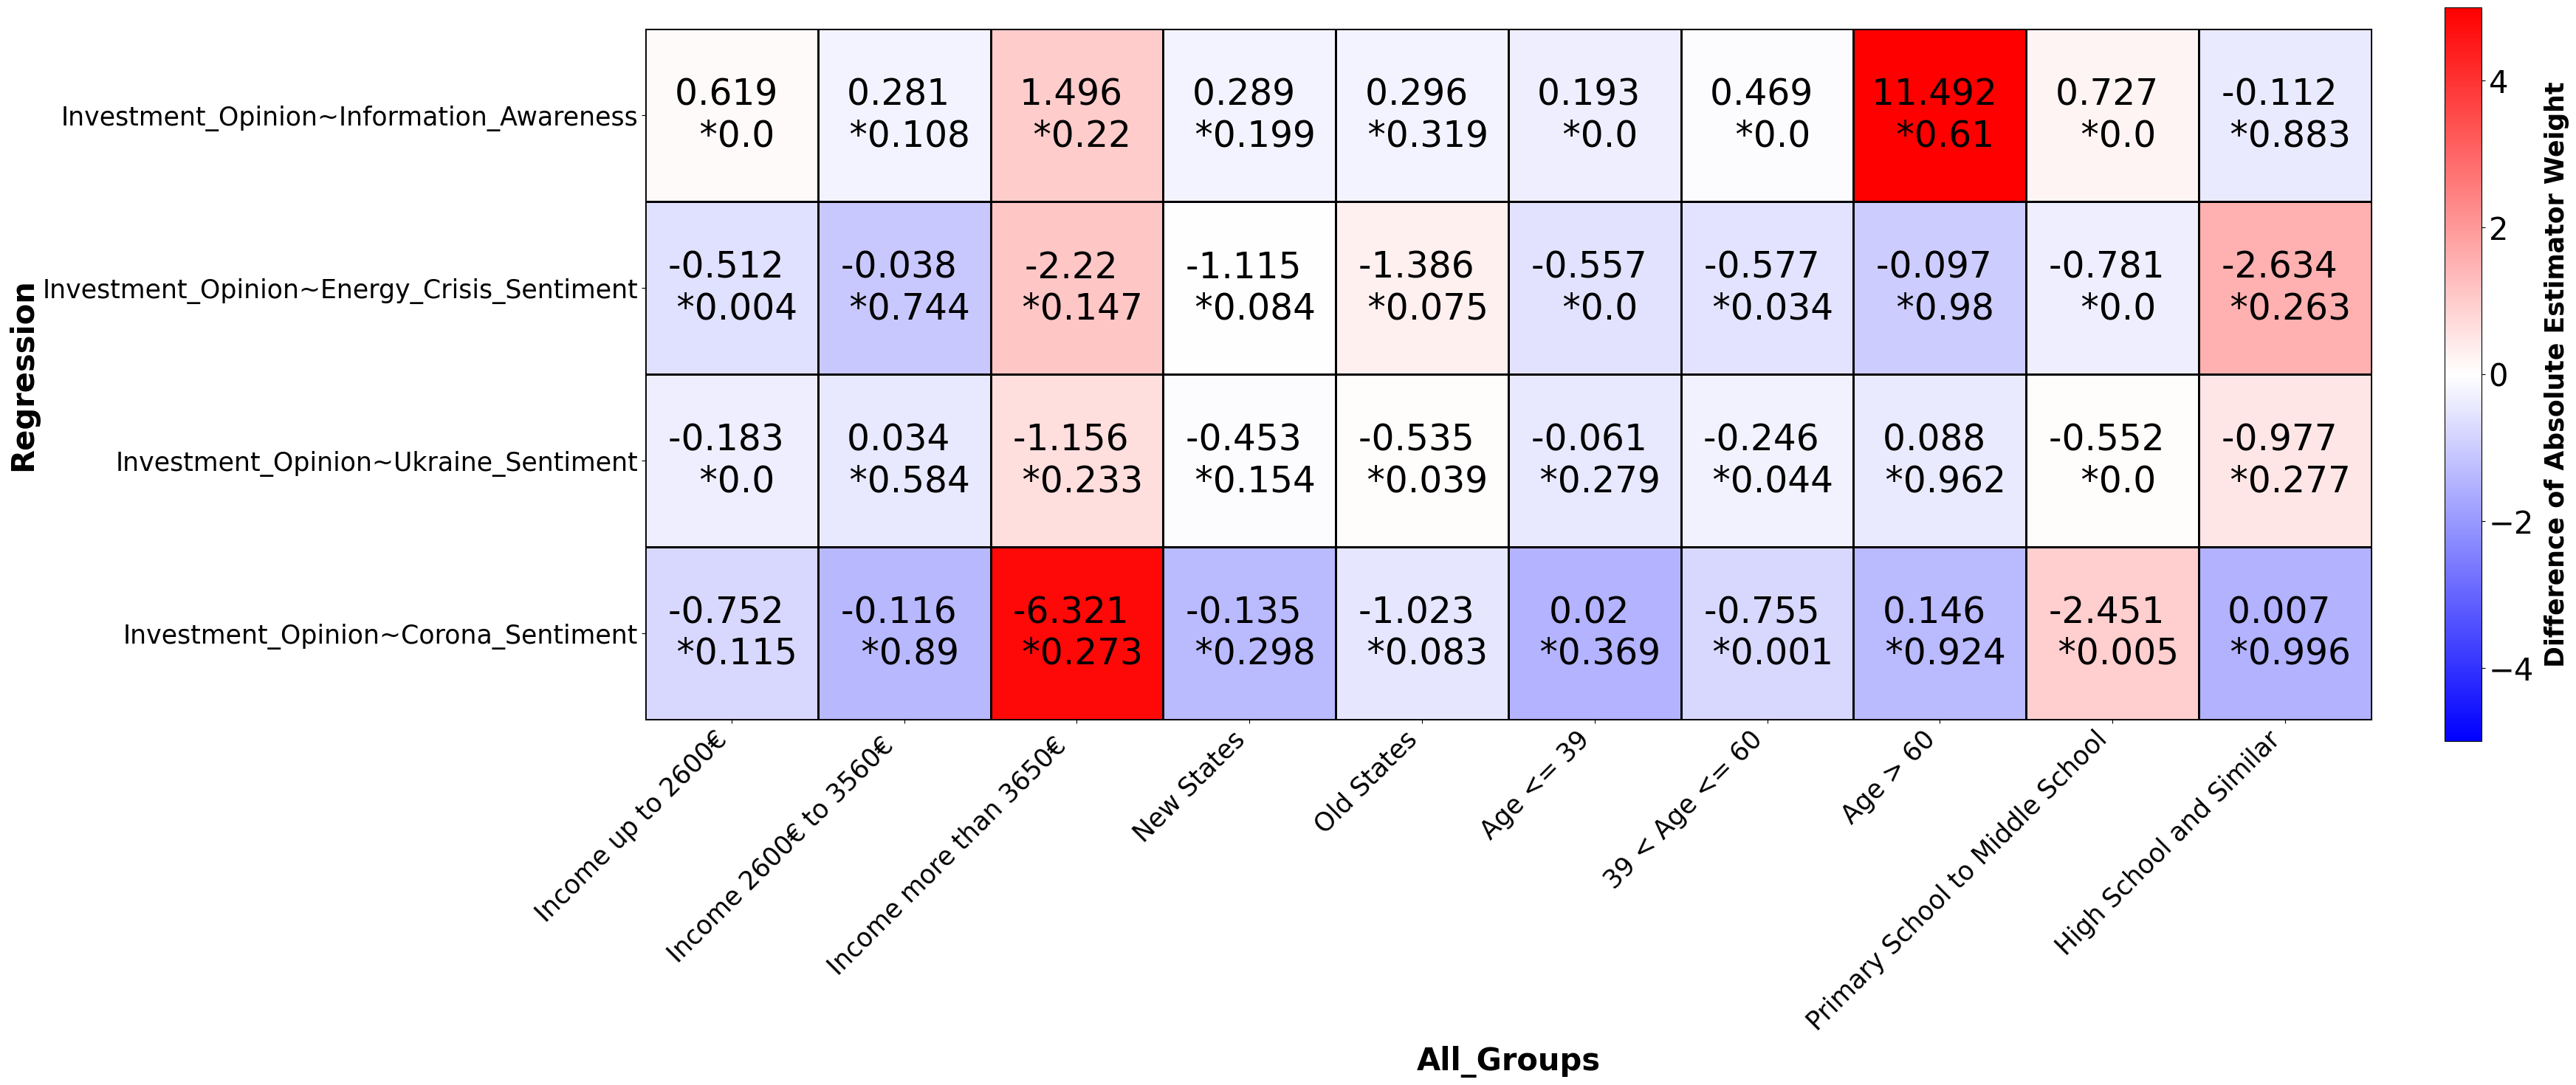

In [6]:
#rename volumns Estimate1, Estimate2, Estimate3

data_income.rename(columns={'Estimate1':'Estimate1_income', 'Estimate2':'Estimate2_income', 'Estimate3':'Estimate3_income'}, inplace=True)
data_age.rename(columns={'Estimate1':'Estimate1_age', 'Estimate2':'Estimate2_age', 'Estimate3':'Estimate3_age'}, inplace=True)
data_states.rename(columns={'Estimate1':'Estimate1_states', 'Estimate2':'Estimate2_states'}, inplace=True)
data_edu.rename(columns={'Estimate1':'Estimate1_edu', 'Estimate2':'Estimate2_edu'}, inplace=True)

df_investment = pd.merge(data_income, pd.merge(data_states, pd.merge(data_age, data_edu, on=['lval','op', 'rval', 'ylabel']), on=['lval', 'op', 'rval', 'ylabel']), on=['lval', 'op', 'rval', 'ylabel'])

df_investment.drop(columns={'ylabel'}, inplace=True)

#drop columns where lval!=Investment_Opinion
df_investment = df_investment[df_investment['lval'] == 'Investment_Opinion']

p_income.rename(columns={'p-value1':'p-value1_income', 'p-value2':'p-value2_income', 'p-value3':'p-value3_income'}, inplace=True)
p_age.rename(columns={'p-value1':'p-value1_age', 'p-value2':'p-value2_age', 'p-value3':'p-value3_age'}, inplace=True)
p_states.rename(columns={'p-value1':'p-value1_states', 'p-value2':'p-value2_states'}, inplace=True)
p_edu.rename(columns={'p-value1':'p-value1_edu', 'p-value2':'p-value2_edu'}, inplace=True)

p_investment = pd.merge(p_income, pd.merge(p_states, pd.merge(p_age, p_edu, on=['lval','op', 'rval']), on=['lval', 'op', 'rval']), on=['lval', 'op', 'rval'])

p_investment = p_investment[p_investment['lval'] == 'Investment_Opinion']

plot_all_pvalue_change(data_main[data_main['lval'] == 'Investment_Opinion'], df_investment, ['Estimate1_income', 'Estimate2_income', 'Estimate3_income', 'Estimate1_states', 'Estimate2_states', 'Estimate1_age', 'Estimate2_age', 'Estimate3_age', 'Estimate1_edu', 'Estimate2_edu'], p_investment, ['Income up to 2600€', 'Income 2600€ to 3560€ ', 'Income more than 3650€ ', 'New States', 'Old States', 'Age <= 39', '39 < Age <= 60', 'Age > 60', 'Primary School to Middle School', 'High School and Similar'], 'All_Groups')

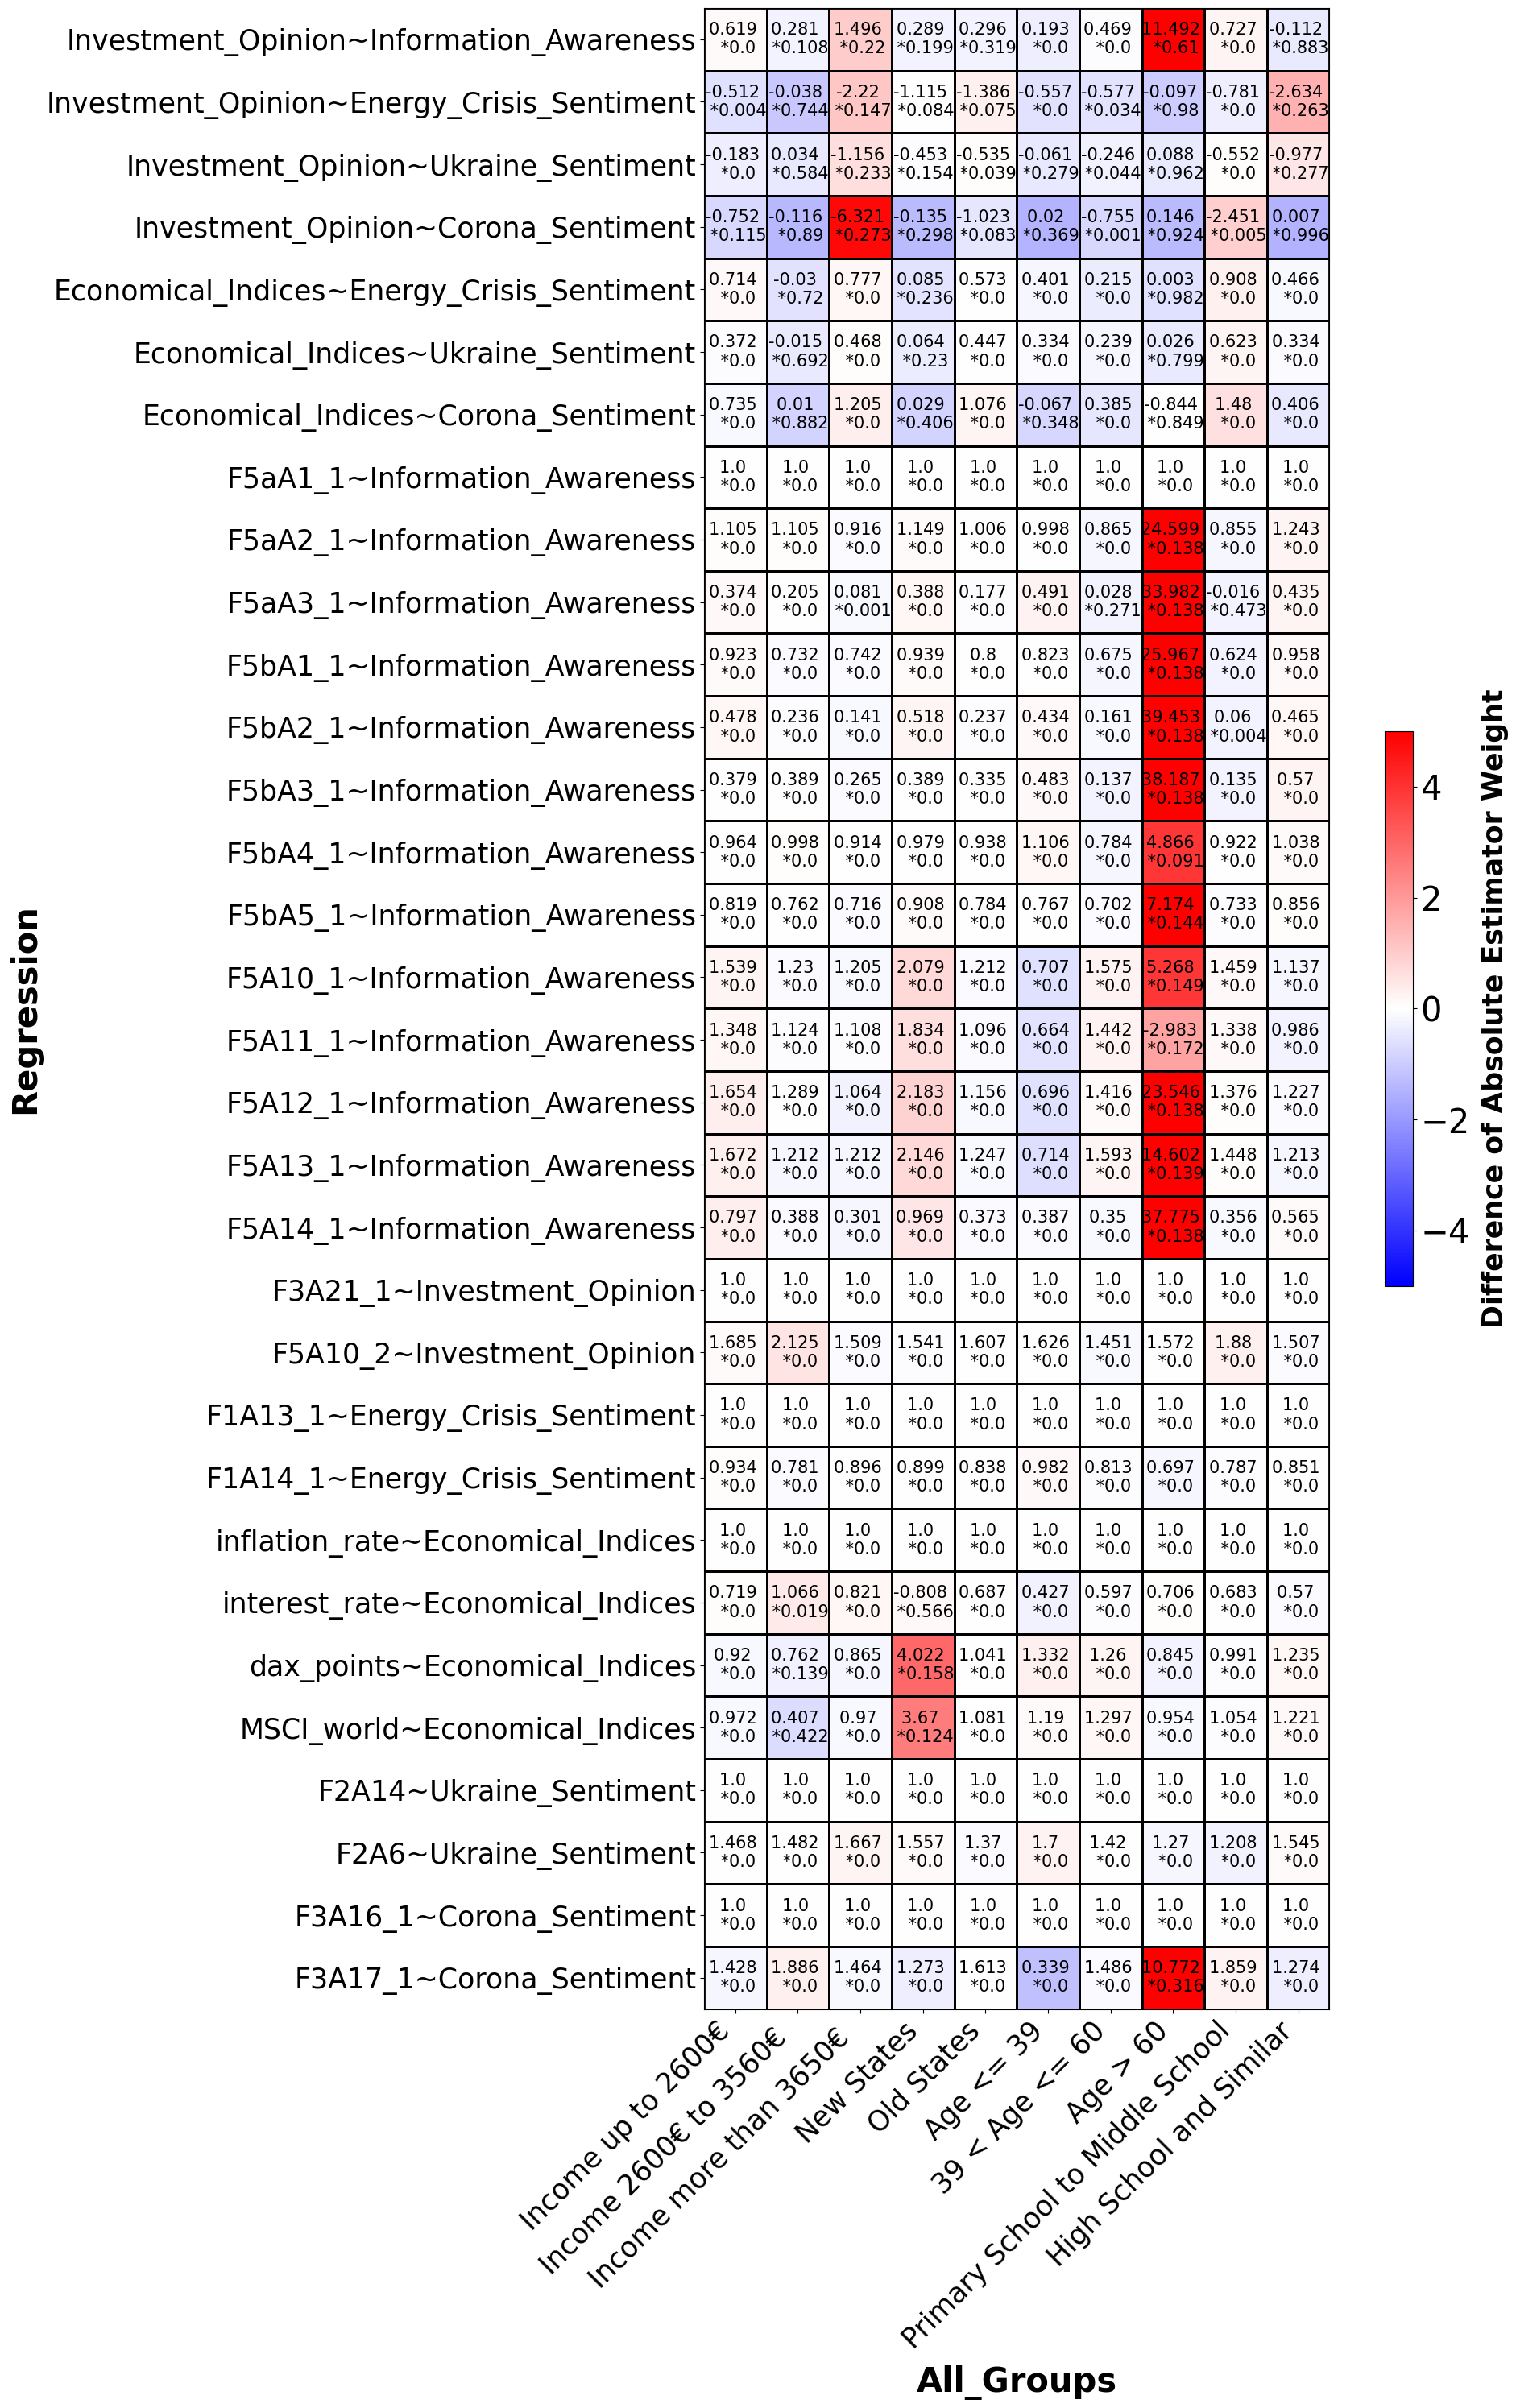

In [7]:
data_income.rename(columns={'Estimate1':'Estimate1_income', 'Estimate2':'Estimate2_income', 'Estimate3':'Estimate3_income'}, inplace=True)
data_age.rename(columns={'Estimate1':'Estimate1_age', 'Estimate2':'Estimate2_age', 'Estimate3':'Estimate3_age'}, inplace=True)
data_states.rename(columns={'Estimate1':'Estimate1_states', 'Estimate2':'Estimate2_states'}, inplace=True)
data_edu.rename(columns={'Estimate1':'Estimate1_edu', 'Estimate2':'Estimate2_edu'}, inplace=True)

df_investment = pd.merge(data_income, pd.merge(data_states, pd.merge(data_age, data_edu, on=['lval','op', 'rval', 'ylabel']), on=['lval', 'op', 'rval', 'ylabel']), on=['lval', 'op', 'rval', 'ylabel'])

df_investment.drop(columns={'ylabel'}, inplace=True)

p_income.rename(columns={'p-value1':'p-value1_income', 'p-value2':'p-value2_income', 'p-value3':'p-value3_income'}, inplace=True)
p_age.rename(columns={'p-value1':'p-value1_age', 'p-value2':'p-value2_age', 'p-value3':'p-value3_age'}, inplace=True)
p_states.rename(columns={'p-value1':'p-value1_states', 'p-value2':'p-value2_states'}, inplace=True)
p_edu.rename(columns={'p-value1':'p-value1_edu', 'p-value2':'p-value2_edu'}, inplace=True)

p_investment = pd.merge(p_income, pd.merge(p_states, pd.merge(p_age, p_edu, on=['lval','op', 'rval']), on=['lval', 'op', 'rval']), on=['lval', 'op', 'rval'])

plot_all_data(data_main, df_investment, ['Estimate1_income', 'Estimate2_income', 'Estimate3_income', 'Estimate1_states', 'Estimate2_states', 'Estimate1_age', 'Estimate2_age', 'Estimate3_age', 'Estimate1_edu', 'Estimate2_edu'], p_investment, ['Income up to 2600€', 'Income 2600€ to 3560€ ', 'Income more than 3650€ ', 'New States', 'Old States', 'Age <= 39', '39 < Age <= 60', 'Age > 60', 'Primary School to Middle School', 'High School and Similar'], 'All_Groups')